# Entrega - Regressão Linear com Regularização
Entregar um Jupyter Notebook apresentando a versão do Regressor Linear com Regularização.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Regressão Linear
Implementação do algoritmo de regressão linear.

ERROR: [[0.45124445]]
WEIGHTS: [[0.62918932]
 [0.34051038]]
ERROR: [[0.44983444]]
WEIGHTS: [[0.6279181 ]
 [0.34160895]]
ERROR: [[0.33385286]]
WEIGHTS: [[0.51270002]
 [0.44094285]]
ERROR: [[0.25610499]]
WEIGHTS: [[0.41817131]
 [0.52204635]]
ERROR: [[0.20398578]]
WEIGHTS: [[0.34061769]
 [0.58826621]]
ERROR: [[0.16904626]]
WEIGHTS: [[0.27699154]
 [0.64233457]]
ERROR: [[0.14562309]]
WEIGHTS: [[0.22479224]
 [0.68648194]]
ERROR: [[0.12992005]]
WEIGHTS: [[0.18196806]
 [0.72252924]]
ERROR: [[0.1193924]]
WEIGHTS: [[0.14683559]
 [0.7519631 ]]
ERROR: [[0.11233429]]
WEIGHTS: [[0.11801359]
 [0.77599721]]
ERROR: [[0.10760218]]
WEIGHTS: [[0.09436884]
 [0.79562246]]


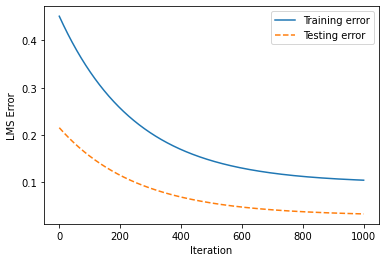

In [2]:
class LinearRegression:
    
    def __init__(self, dataFilePath, outputPath, alpha=0.01, 
                 maxIter = 500, errorThreshold=0.001, 
                 performTest = False, normalize = False):

        self.dataFilePath = dataFilePath
        self.outputPath   = outputPath
        self.alpha        = alpha
        self.maxIter      = maxIter
        self.errorThreshold = errorThreshold
        self.performTest    = performTest
        self.normalize      = normalize

        self.loadDataFromFile()
        self.initWeights()

    '''NORMALIZAR OS DADOS USANDO Z_SCORE -> https://www.codecademy.com/articles/normalization'''
    def featureNormalize(self, X):
        #TODO: NORMALIZAR OS DADOS USANDO Z_SCORE
        X_Norm = X
        for i in range(len(X[0])):
            m = np.mean(X[:, i])
            s = np.std(X[:,i])
            X_Norm[:, i] = (X_Norm[:,i] - m) / s
        return X_Norm
        
        
    '''Carrega os dados de um arquivo, separado por ponto e vírgula'''
    def loadDataFromFile(self):
        #TODO: CARREGAR DADOS DO ARQUIVO
        datasetLoaded = np.loadtxt(self.dataFilePath, delimiter=";", skiprows=1)
        
        if self.normalize:
            datasetLoaded = self.featureNormalize(datasetLoaded)
        
        self.nExamples = datasetLoaded.shape[0] # Número de exemplos que foi carregado
        self.nAttributes = len(datasetLoaded[0]) # Número de atributos (colunas)
        
        if(self.performTest):
            nExamplesTest = int(self.nExamples/3.0)
            self.testData = np.ones(shape=(nExamplesTest, self.nAttributes)) # Cria matriz, de uns, com nExamplesTest linhas e nAttributes colunas
            self.testTarget = np.zeros(shape=(nExamplesTest,1)) # Cria matriz, de zeros, com nExamplesTest linhas e 1 coluna
            
            linesForTest = random.sample(range(0, self.nExamples), nExamplesTest) # Cria uma lista com números randomizados, que será utilizado para pegar as linhas que serão utilizadas como teste
            
            count = 0
            for line in linesForTest: # Monta os dados de teste, testData, e de objetivo, testTarget
                self.testData[count, 1] = datasetLoaded[line, :-1]
                self.testTarget[count] = datasetLoaded[line, -1]
                count+=1
            datasetLoaded = np.delete(datasetLoaded, linesForTest, 0) # Deleta as linhas que foram separadas para teste
            self.nExamples -= nExamplesTest # Diminui o número de exemplos, retirando a quantidade que foi separada para teste
        
        self.dataset = np.ones(shape=(self.nExamples, self.nAttributes)) # Cria matriz de uns, com número de linhas nExamples e número de colunas nAttributes
        self.dataset[:, 1:] = datasetLoaded[:, :-1] #X, Y -> X0, X1   -   Y    Cria matriz com os dados que será utilizado no treinamento, não copiando a coluna Y (objetivo)
        self.target = datasetLoaded[:, -1] # Cria matriz com os dados objetivos (Y)
        self.target.shape = (self.nExamples, 1) # Transforma a matriz para ficar com nExamples linhas e 1 coluna
        
        
    '''Inicializa os pesos de Theta0 e Theta1'''
    def initWeights(self):
        #TODO: INICIAR OS PESOS: THETA0 e THETA1
        self.weights = np.ones(shape=(self.nAttributes, 1)) # Cria uma matriz, de uns, com nAttributes linhas e 1 coluna
        for i in range (0, self.nAttributes):
            self.weights[i][0] = random.random() # Randomiza um número entre 0-1 -> https://docs.python.org/3/library/random.html#random.random
        
    '''Saída da função linear = Theta(transposto) * X'''
    def linearFunction(self, data):
        #TODO: SAIDA DA FUNCAO LINEAR = THETA(t) * X
        output = data.dot(self.weights) # Multiplicação(dot) da matriz data pela matriz weights
        return output

    '''Calcula o erro para um ponto'''
    def calculateError(self, data, target):
        #TODO: CALCULAR O ERRO PARA UM PONTO (não seria para todos os pontos, pois é calculado para toda matriz)
        output = self.linearFunction(data)  #[1.3, 4.5, 8.3, 4.5, 1.2]   Calcula a função linear
        error = output - target
        return error #[4.5, 8, 7.2, 5.6, 3.2]
        
    '''Calcula o erro quadrático para todos os pontos'''
    def squaredErrorCost(self, data, target):
        #TODO: CALCULAR O ERRO PARA TODOS OS PONTOS
        error = self.calculateError(data, target)
        squaredError = (1.0 / (2 * self.nExamples)) * (error.T.dot(error)) # Calculo do erro quadrático
        return squaredError
        
    '''Calcula o gradiente descendente'''
    def gradientDescent(self):
        #TODO: GRADIENTE DESCENDENTE
        cost = self.calculateError(self.dataset, self.target) # Calcula o erro
        for i in range(self.nAttributes):
            temp = self.dataset[:, i]
            temp.shape = (self.nExamples, 1)
            currentErrors = cost * temp
            self.weights[i][0] = self.weights[i][0] - self.alpha * ((1.0/self.nExamples) * currentErrors.sum()) # Realiza o calculo do gradiente descendente e atuliza os pesos
        

    def plotCostGraph(self, trainingErrorsList, testingErrorsList=None):
        xAxisValues = range(0, len(trainingErrorsList))
        line1 = plt.plot(xAxisValues, trainingErrorsList, label="Training error")
        if self.performTest:
            line2 = plt.plot(xAxisValues, testingErrorsList, linestyle="dashed", label="Testing error")

        plt.legend()
        plt.xlabel("Iteration")
        plt.ylabel("LMS Error")
        plt.savefig(self.outputPath + "/lms_error.png")
        plt.show()
        plt.close()

    def plotLineGraph(self, weightsToPlot, iteration):

        if self.performTest:
            dataToPlot   = np.append(self.dataset, self.testData,0)
            targetToPlot = np.append(self.target, self.testTarget,0)

        else:
            dataToPlot   = self.dataset
            targetToPlot = self.target


        xAxisValues = dataToPlot[:,1]
        yAxisValues = targetToPlot

        xMax = max(xAxisValues)
        xMin = min(xAxisValues)
        yMax = max(yAxisValues)

        axes = plt.gca()
        axes.set_xlim([0, xMax + 1])
        axes.set_ylim([0, yMax + 1])

        xLineValues = np.arange(xMin, xMax, 0.1)
        yLineValues = weightsToPlot[0] + xLineValues * weightsToPlot[1]

        plt.plot(xLineValues, yLineValues)
        plt.plot(xAxisValues, yAxisValues, 'o')
        plt.savefig(self.outputPath + "/line_" + str(iteration) + ".png")
        plt.close()

    '''Executa a regressão linear'''
    def run(self):
        #TODO: PRINCIPAL
        lmsError = self.squaredErrorCost(self.dataset, self.target) # Dataset: X0, X1  Target: Y  Calcula o erro quadrático
        count = 0 
        trainingErrors = list()
        testingErrors = list()
        trainingErrors.append(lmsError[0])
        
        if self.performTest:
            lmsTestError = self.squaredErrorCost(self.testData, self.testTarget) # Calcula o erro quadrático para os dados de teste
            testingErrors.append(lmsTestError[0])
        
        print("ERROR: " + str(lmsError))
        print("WEIGHTS: " + str(self.weights))
        
        while lmsError > self.errorThreshold and count < self.maxIter:
            self.gradientDescent() # Calcula o gradiente descendente
            
            lmsError = self.squaredErrorCost(self.dataset, self.target)
            trainingErrors.append(lmsError[0])
            
            if self.performTest:
                lmsTestError = self.squaredErrorCost(self.testData, self.testTarget)
                testingErrors.append(lmsTestError[0])
            
            if count % 100 == 0:
                print("ERROR: " + str(lmsError))
                print("WEIGHTS: " + str(self.weights))
                self.plotLineGraph(self.weights, count)
            count+=1
        
        if self.performTest:
            self.plotCostGraph(trainingErrors, testingErrors)
        else:
            self.plotCostGraph(trainingErrors)
            
        

if __name__ == '__main__':
        linReg = LinearRegression("./income.csv",
                              "./graficos/income", 
                              normalize=True, performTest=True, alpha=0.002, maxIter=1000)
        linReg.run()

## Regressão Linear com Regularização
Implementação do algoritmo de regressão linear com regularização

ERROR: [[0.55874324]]
WEIGHTS: [[0.37172306]
 [0.06051083]]
ERROR: [[0.55689538]]
WEIGHTS: [[0.37089967]
 [0.06222593]]
ERROR: [[0.40861912]]
WEIGHTS: [[0.29701109]
 [0.21714425]]
ERROR: [[0.3149728]]
WEIGHTS: [[0.23762527]
 [0.34336127]]
ERROR: [[0.25660737]]
WEIGHTS: [[0.18990767]
 [0.44620012]]
ERROR: [[0.22089538]]
WEIGHTS: [[0.1515757 ]
 [0.52999568]]
ERROR: [[0.199619]]
WEIGHTS: [[0.12079165]
 [0.59827818]]
ERROR: [[0.18744915]]
WEIGHTS: [[0.09607621]
 [0.65392273]]
ERROR: [[0.18094589]]
WEIGHTS: [[0.07623886]
 [0.69927102]]
ERROR: [[0.1779019]]
WEIGHTS: [[0.06032164]
 [0.73623038]]
ERROR: [[0.17691182]]
WEIGHTS: [[0.04755392]
 [0.76635444]]


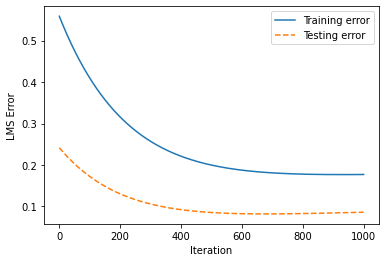

In [3]:
class LinearRegressionWithRegularization:

    def __init__(self, dataFilePath, outputPath, alpha=0.01, regLambda=0.01,
                 maxIter=500, errorThreshold=0.001,
                 performTest=False, normalize=False):

        self.dataFilePath = dataFilePath
        self.outputPath = outputPath
        self.alpha = alpha
        self.regLambda = regLambda
        self.maxIter = maxIter
        self.errorThreshold = errorThreshold
        self.performTest = performTest
        self.normalize = normalize

        self.loadDataFromFile()
        self.initWeights()

    '''NORMALIZAR OS DADOS USANDO Z_SCORE -> https://www.codecademy.com/articles/normalization'''

    def featureNormalize(self, X):
        # TODO: NORMALIZAR OS DADOS USANDO Z_SCORE
        X_Norm = X
        for i in range(len(X[0])):
            m = np.mean(X[:, i])
            s = np.std(X[:, i])
            X_Norm[:, i] = (X_Norm[:, i] - m) / s
        return X_Norm

    '''Carrega os dados de um arquivo, separado por ponto e vírgula'''

    def loadDataFromFile(self):
        # TODO: CARREGAR DADOS DO ARQUIVO
        datasetLoaded = np.loadtxt(self.dataFilePath, delimiter=";", skiprows=1)

        if self.normalize:
            datasetLoaded = self.featureNormalize(datasetLoaded)

        self.nExamples = datasetLoaded.shape[0]  # Número de exemplos que foi carregado
        self.nAttributes = len(datasetLoaded[0])  # Número de atributos (colunas)

        if (self.performTest):
            nExamplesTest = int(self.nExamples / 3.0)
            self.testData = np.ones(shape=(
                nExamplesTest, self.nAttributes))  # Cria matriz, de uns, com nExamplesTest linhas e nAttributes colunas
            self.testTarget = np.zeros(
                shape=(nExamplesTest, 1))  # Cria matriz, de zeros, com nExamplesTest linhas e 1 coluna

            linesForTest = random.sample(range(0, self.nExamples),
                                         nExamplesTest)  # Cria uma lista com números randomizados, que será utilizado para pegar as linhas que serão utilizadas como teste

            count = 0
            for line in linesForTest:  # Monta os dados de teste, testData, e de objetivo, testTarget
                self.testData[count, 1] = datasetLoaded[line, :-1]
                self.testTarget[count] = datasetLoaded[line, -1]
                count += 1
            datasetLoaded = np.delete(datasetLoaded, linesForTest, 0)  # Deleta as linhas que foram separadas para teste
            self.nExamples -= nExamplesTest  # Diminui o número de exemplos, retirando a quantidade que foi separada para teste

        self.dataset = np.ones(shape=(self.nExamples,
                                      self.nAttributes))  # Cria matriz de uns, com número de linhas nExamples e número de colunas nAttributes
        self.dataset[:, 1:] = datasetLoaded[:, :-1]  # X, Y -> X0, X1   -   Y    Cria matriz com os dados que será utilizado no treinamento, não copiando a coluna Y (objetivo)
        self.target = datasetLoaded[:, -1]  # Cria matriz com os dados objetivos (Y)
        self.target.shape = (self.nExamples, 1)  # Transforma a matriz para ficar com nExamples linhas e 1 coluna

    '''Inicializa os pesos de Theta0 e Theta1'''

    def initWeights(self):
        # TODO: INICIAR OS PESOS: THETA0 e THETA1
        self.weights = np.ones(
            shape=(self.nAttributes, 1))  # Cria uma matriz, de uns, com nAttributes linhas e 1 coluna
        for i in range(0, self.nAttributes):
            self.weights[i][
                0] = random.random()  # Randomiza um número entre 0-1 -> https://docs.python.org/3/library/random.html#random.random

    '''Saída da função linear = Theta(transposto) * X'''

    def linearFunction(self, data):
        # TODO: SAIDA DA FUNCAO LINEAR = THETA(t) * X
        output = data.dot(self.weights)  # Multiplicação(dot) da matriz data pela matriz weights
        return output

    '''Calcula o erro para um ponto'''

    def calculateError(self, data, target):
        # TODO: CALCULAR O ERRO PARA UM PONTO (não seria para todos os pontos, pois é calculado para toda matriz)
        output = self.linearFunction(data)  # [1.3, 4.5, 8.3, 4.5, 1.2]   Calcula a função linear
        error = output - target
        return error  # [4.5, 8, 7.2, 5.6, 3.2]

    '''Calcula o erro quadrático para todos os pontos'''

    def squaredErrorCostRegularized(self, data, target):
        # TODO: CALCULAR O ERRO PARA TODOS OS PONTOS
        error = self.calculateError(data, target)
        squaredError = ((1.0 / (2 * self.nExamples)) * (error.T.dot(error))) + (self.regLambda * (self.weights.T.dot(self.weights))) # Calculo do erro quadrático
        return squaredError

    '''Calcula o gradiente descendente'''

    def gradientDescentRegularized(self):
        # TODO: GRADIENTE DESCENDENTE
        cost = self.calculateError(self.dataset, self.target)  # Calcula o erro
        for i in range(self.nAttributes):
            temp = self.dataset[:, i]
            temp.shape = (self.nExamples, 1)
            currentErrors = cost * temp
            self.weights[i][0] = self.weights[i][0] * (1 - (self.alpha * (self.regLambda / self.nExamples))) - self.alpha * ((1.0 / self.nExamples) * currentErrors.sum())  # Realiza o calculo do gradiente descendente e atuliza os pesos

    def plotCostGraph(self, trainingErrorsList, testingErrorsList=None):
        xAxisValues = range(0, len(trainingErrorsList))
        line1 = plt.plot(xAxisValues, trainingErrorsList, label="Training error")
        if self.performTest:
            line2 = plt.plot(xAxisValues, testingErrorsList, linestyle="dashed", label="Testing error")

        plt.legend()
        plt.xlabel("Iteration")
        plt.ylabel("LMS Error")
        plt.savefig(self.outputPath + "/regularized_lms_error.png")
        plt.show()
        plt.close()

    def plotLineGraph(self, weightsToPlot, iteration):

        if self.performTest:
            dataToPlot = np.append(self.dataset, self.testData, 0)
            targetToPlot = np.append(self.target, self.testTarget, 0)

        else:
            dataToPlot = self.dataset
            targetToPlot = self.target

        xAxisValues = dataToPlot[:, 1]
        yAxisValues = targetToPlot

        xMax = max(xAxisValues)
        xMin = min(xAxisValues)
        yMax = max(yAxisValues)

        axes = plt.gca()
        axes.set_xlim([0, xMax + 1])
        axes.set_ylim([0, yMax + 1])

        xLineValues = np.arange(xMin, xMax, 0.1)
        yLineValues = weightsToPlot[0] + xLineValues * weightsToPlot[1]

        plt.plot(xLineValues, yLineValues)
        plt.plot(xAxisValues, yAxisValues, 'o')
        plt.savefig(self.outputPath + "/regularized_line_" + str(iteration) + ".png")
        plt.close()

    '''Executa a regressão linear'''

    def run(self):
        # TODO: PRINCIPAL
        lmsError = self.squaredErrorCostRegularized(self.dataset,
                                                    self.target)  # Dataset: X0, X1  Target: Y  Calcula o erro quadrático
        count = 0
        trainingErrors = list()
        testingErrors = list()
        trainingErrors.append(lmsError[0])

        if self.performTest:
            lmsTestError = self.squaredErrorCostRegularized(self.testData,
                                                            self.testTarget)  # Calcula o erro quadrático para os dados de teste
            testingErrors.append(lmsTestError[0])

        print("ERROR: " + str(lmsError))
        print("WEIGHTS: " + str(self.weights))

        while lmsError > self.errorThreshold and count < self.maxIter:
            self.gradientDescentRegularized()  # Calcula o gradiente descendente regularizado

            lmsError = self.squaredErrorCostRegularized(self.dataset, self.target)
            trainingErrors.append(lmsError[0])

            if self.performTest:
                lmsTestError = self.squaredErrorCostRegularized(self.testData, self.testTarget)
                testingErrors.append(lmsTestError[0])

            if count % 100 == 0:
                print("ERROR: " + str(lmsError))
                print("WEIGHTS: " + str(self.weights))
                self.plotLineGraph(self.weights, count)
            count += 1

        if self.performTest:
            self.plotCostGraph(trainingErrors, testingErrors)
        else:
            self.plotCostGraph(trainingErrors)


if __name__ == '__main__':
    linRegRegularized = LinearRegressionWithRegularization("./income.csv",
                                                           "./graficos/income/regularized",
                                                           normalize=True, performTest=True, alpha=0.002, regLambda=0.1,
                                                           maxIter=1000)

    linRegRegularized.run()

## Comparação entre as saídas
Comparação do resultado da execução entre Regressão Linear e Regressão Linear com Regularização. Os pesos dos Thetas são iniciados igualmente para os dois exemplos.

--------------> Regressão Linear <-----------------
ERROR: [[0.54091382]]
WEIGHTS: [[0.16201044]
 [0.03419929]]
ERROR: [[0.53909885]]
WEIGHTS: [[0.16175537]
 [0.0360884 ]]
ERROR: [[0.39158438]]
WEIGHTS: [[0.13773099]
 [0.20592919]]
ERROR: [[0.29514285]]
WEIGHTS: [[0.1165192 ]
 [0.34299256]]
ERROR: [[0.23204848]]
WEIGHTS: [[0.09790803]
 [0.45362079]]
ERROR: [[0.19074195]]
WEIGHTS: [[0.08166624]
 [0.54292594]]
ERROR: [[0.16368036]]
WEIGHTS: [[0.06755803]
 [0.615029  ]]
ERROR: [[0.14593855]]
WEIGHTS: [[0.0553529 ]
 [0.67325253]]
ERROR: [[0.13429845]]
WEIGHTS: [[0.04483192]
 [0.72027565]]
ERROR: [[0.126656]]
WEIGHTS: [[0.0357915 ]
 [0.75825903]]
ERROR: [[0.12163455]]
WEIGHTS: [[0.02804533]
 [0.7889454 ]]


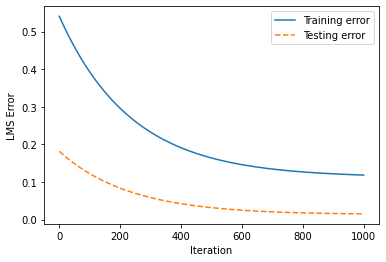

--------------> Regressão Linear com Regularização <-----------------
ERROR: [[0.42864136]]
WEIGHTS: [[0.16201044]
 [0.03419929]]
ERROR: [[0.42729715]]
WEIGHTS: [[0.1615468 ]
 [0.03577261]]
ERROR: [[0.31690799]]
WEIGHTS: [[0.1199283 ]
 [0.17836324]]
ERROR: [[0.24320531]]
WEIGHTS: [[0.08646011]
 [0.29533686]]
ERROR: [[0.19404571]]
WEIGHTS: [[0.05955584]
 [0.39129851]]
ERROR: [[0.16129742]]
WEIGHTS: [[0.03793625]
 [0.47002489]]
ERROR: [[0.1395162]]
WEIGHTS: [[0.02057008]
 [0.53461346]]
ERROR: [[0.12505817]]
WEIGHTS: [[0.00662619]
 [0.58760466]]
ERROR: [[0.11548527]]
WEIGHTS: [[-0.00456507]
 [ 0.63108217]]
ERROR: [[0.1091671]]
WEIGHTS: [[-0.01354312]
 [ 0.66675506]]
ERROR: [[0.10501396]]
WEIGHTS: [[-0.02074231]
 [ 0.6960252 ]]


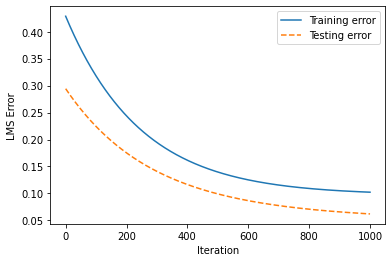

In [4]:
if __name__ == '__main__':
    linReg = LinearRegression("./income.csv",
                              "./graficos/income",
                              normalize=True, performTest=True, alpha=0.002, maxIter=1000)
    
    linRegRegularized = LinearRegressionWithRegularization("./income.csv",
                                                           "./graficos/income/regularized",
                                                           normalize=True, performTest=True, alpha=0.002, regLambda=0.01,
                                                           maxIter=1000)
    
    linRegRegularized.weights = linReg.weights.copy()

    print('--------------> Regressão Linear <-----------------')
    linReg.run()
    print('--------------> Regressão Linear com Regularização <-----------------')
    linRegRegularized.run()